In [3]:
# importing the importent libraries
import tensorflow as tf
import pandas as pd
import numpy as np

In [4]:
# data fetching
data = pd.read_csv("Dataset.csv")

X=data.iloc[:,:6].values
y=data.iloc[:,6:7].values


In [5]:
# train-test spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

scy = StandardScaler()
y_train = scy.fit_transform(y_train.reshape(-1,1))
y_test =scy.transform(y_test.reshape(-1,1))

In [7]:
X_train

array([[-0.91587526, -0.86731563, -1.62367597,  0.62200083, -0.09842504,
        -1.70235721],
       [-0.72222575, -0.48122292,  1.59788679,  1.02211314,  1.41929716,
        -0.75637046],
       [ 1.44632263, -1.52915782, -0.66335259, -0.94761773, -1.51020114,
         1.71637078],
       ...,
       [ 0.29995592, -0.55459421, -0.0209799 ,  1.36393074, -0.51355768,
        -0.12372792],
       [-1.22752108,  0.6541303 ,  1.33974927,  1.68002337,  0.78364022,
        -1.20332218],
       [ 0.96145768, -1.52968533, -0.77932179,  0.51878528, -0.7442473 ,
        -1.13014362]])

In [8]:
X_test

array([[-1.01510242, -0.93569283, -0.26433961,  1.63277291, -0.69820372,
         0.44575303],
       [ 0.90459818, -0.71513759, -1.11993551, -1.619613  ,  1.02986167,
        -0.5653181 ],
       [-0.26619767,  0.07945372,  1.0408355 , -0.42602557,  0.94304581,
         0.79812334],
       ...,
       [-0.83960056, -1.171871  , -0.52455909,  0.32382334,  0.05353486,
        -0.48054113],
       [-1.09678575,  1.67441034,  0.47188774, -1.73155286, -1.01514167,
         0.00527377],
       [ 0.35554747, -0.63402426,  0.89879057,  0.96712034,  1.23209119,
         0.45199262]])

In [9]:
# building a ann model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [10]:
#initializing the ANN layer
Classifier=Sequential()

In [11]:
## Adding the input layer
Classifier.add(Dense(units=11, activation='relu'))

In [12]:
## adding the first hidden layer
Classifier.add(Dense(units=7, activation='relu'))
Classifier.add(Dropout(0.2))   # adding the dropout here

In [13]:
## adding the second  hidden layer
Classifier.add(Dense(units=6, activation='relu'))
Classifier.add(Dropout(0.3)) #adding the  dropout in second hidden layer

In [27]:
## adding the output layer
Classifier.add(Dense(1, activation='linear'))

In [28]:
## adding the optimezers and loss function and metric
Classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]   # better for regression
)


In [29]:
##early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [30]:
## trainnig again my ANN mOdel
model_history=Classifier.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.2, verbose=1, callbacks=early_stopping)

Epoch 1/50
448/448 [==============================] - 5s 6ms/step - loss: 0.4730 - mae: 0.5163 - val_loss: 0.3705 - val_mae: 0.4654
Epoch 2/50
448/448 [==============================] - 2s 5ms/step - loss: 0.3416 - mae: 0.4450 - val_loss: 0.2735 - val_mae: 0.4036
Epoch 3/50
448/448 [==============================] - 3s 6ms/step - loss: 0.2787 - mae: 0.4073 - val_loss: 0.2268 - val_mae: 0.3730
Epoch 4/50
448/448 [==============================] - 3s 7ms/step - loss: 0.2454 - mae: 0.3826 - val_loss: 0.1983 - val_mae: 0.3506
Epoch 5/50
448/448 [==============================] - 3s 6ms/step - loss: 0.2226 - mae: 0.3665 - val_loss: 0.1808 - val_mae: 0.3382
Epoch 6/50
448/448 [==============================] - 3s 6ms/step - loss: 0.2095 - mae: 0.3543 - val_loss: 0.1670 - val_mae: 0.3258
Epoch 7/50
448/448 [==============================] - 3s 6ms/step - loss: 0.2074 - mae: 0.3516 - val_loss: 0.1606 - val_mae: 0.3208
Epoch 8/50
448/448 [==============================] - 3s 6ms/step - loss: 0.

In [31]:
loss, mae = Classifier.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")


44/44 [==============================] - 1s 4ms/step - loss: 0.1118 - mae: 0.2683
Test MAE: 0.27


In [32]:
y_pred = Classifier.predict(X_test)
y_pred_actual = scy.inverse_transform(y_pred)
y_test_actual = scy.inverse_transform(y_test)
y_test_actual

44/44 [==============================] - 1s 3ms/step


array([[556.91055754],
       [829.84903051],
       [922.54816572],
       ...,
       [622.77285037],
       [597.79570472],
       [851.11533828]])

In [40]:
# predicting on new data
new_data = np.array([[45.0, 84, 120.0, 60.0,39,0.85]])
scaled_data = sc.transform(new_data)
prediction = Classifier.predict(scaled_data)         # yeh normalized value hai
prediction_actual = scy.inverse_transform(prediction) # yeh real units hai

1/1 [==============================] - 0s 55ms/step


In [41]:
print(f"Predicted Power Consumption: {prediction[0][0]:.2f} units")

Predicted Power Consumption: 1.12 units


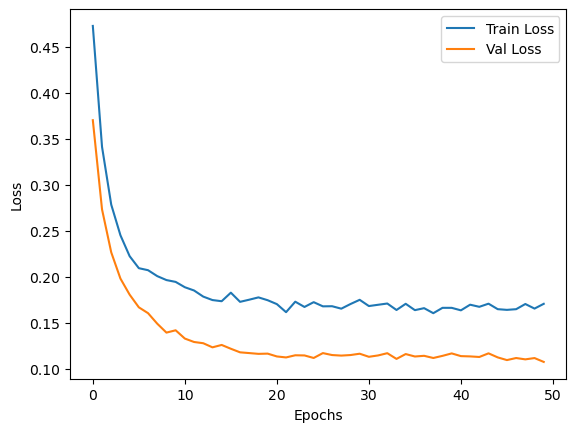

In [42]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["loss"], label="Train Loss")
plt.plot(model_history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [47]:
from scipy.optimize import minimize

# optimizing the feature based on given power consumption 
def optimize_features(desired_power, Classifier, sc, scy, feature_bounds):
    """
    Find optimal machine settings for a target power consumption.
    """
    def objective(features):
        features = np.array(features).reshape(1, -1)
        normalized_features = sc.transform(features)
        prediction_scaled = Classifier.predict(normalized_features, verbose=0)
        prediction_actual = scy.inverse_transform(prediction_scaled)
        return np.abs(desired_power - prediction_actual[0][0])

    initial_guess = [np.mean(b) for b in feature_bounds]
    result = minimize(objective, initial_guess, bounds=feature_bounds)
    return result.x

# Define realistic feature bounds
feature_bounds = [
    (20, 60),    # Temperature
    (40, 100),   # Machine Utilization
    (50, 200),   # Production Rate
    (30, 90),    # Humidity
    (25, 35),    # Load current
    (0.7, 0.85)  # Power factor
]

desired_power = 450.0
optimized_features = optimize_features(desired_power, Classifier, sc, scy, feature_bounds)

print(f"\nOptimized features for {desired_power} units of power consumption:")
print(f"Temperature: {optimized_features[0]:.2f}")
print(f"MachineUtilization: {optimized_features[1]:.2f}")
print(f"ProductionRate: {optimized_features[2]:.2f}")
print(f"Humidity: {optimized_features[3]:.2f}")
print(f"LoadCurrent: {optimized_features[4]:.2f}")
print(f"PowerFactor: {optimized_features[5]:.2f}")



Optimized features for 450.0 units of power consumption:
Temperature: 40.00
MachineUtilization: 70.00
ProductionRate: 125.00
Humidity: 60.00
LoadCurrent: 30.00
PowerFactor: 0.77


In [71]:
# adding the flask
from flask import Flask, request, jsonify
from flask_cors import CORS
import numpy as np

app = Flask(__name__)
CORS(app)  # allow localhost:browser

# assume you already loaded: model, scaler_X, scaler_y

@app.post("/predict")
def predict():
    data = request.get_json()
    x = np.array([[data["Temperature"], data["MachineUtilization"], data["ProductionRate"], data["Humidity"]]])
    x_scaled = scaler_X.transform(x)
    y_scaled = model.predict(x_scaled, verbose=0)
    y = scaler_y.inverse_transform(y_scaled)[0,0]
    return jsonify({"prediction": float(y)})

@app.post("/optimize")
def optimize():
    desired = float(request.get_json()["desired_power"])
    # calling my optimize_features(desired, model, scaler_X, scaler_y, bounds)
    bounds = [(20,60),(40,100),(50,200),(30,90)]
    best = optimize_features(desired, model, scaler_X, scaler_y, bounds)
    return jsonify({
        "Temperature": float(best[0]),
        "MachineUtilization": float(best[1]),
        "ProductionRate": float(best[2]),
        "Humidity": float(best[3]),
    })

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.150:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1